https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

T-test
* Approximate the distribution of a single sample mean

Test statistic
* A metric for the difference or effect of interest

t-statistic
* A standardized version of common test statistics such as means.

t-distribution
* A reference distribution derived from the null hypothesis and the observed t-statistics can be compared.

In [12]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [13]:
ac = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/student-mat.csv')
ac

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [14]:
ac.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

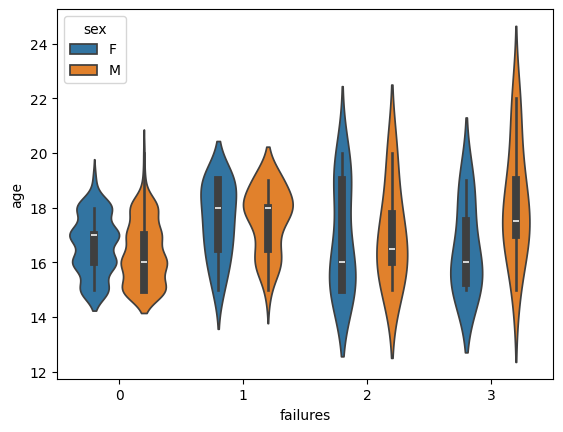

In [15]:
ax = sns.violinplot(data=ac, x='failures', y='age', hue="sex")

In [20]:
res = stats.ttest_ind(ac[ac.sex == 'F'].G3,
                      ac[ac.sex == 'M'].G3,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0198


* The alternative hypothesis is that the mean of the final grade for females is less than the mean of the final grades for male students.

* In resampling mode, we structure to reflect the observed data and the hypothesis to be tested.

* Not worrying whether the data is binary or numeric or samples sizes are balanced.

Type I error
* If you have 20 predictor variables and one outcome variable, all random, the odds are pretty good that at least one predictor will falsely turn out to be statistically significant, if you do a series of 20 significance test at the alpha = 0.05 level.

* Calculate this probability by first finding the probability that all will correctly test non-significant is 0.95, so the probability that all 20 will correctly test non-significant is 0.95^20 = 0.36.

Alpha Inflation
* The probability that at least one predictor will falsely test significant is the flip side or 1 - (probability tha t all will be non-significant) = 0.64

Fitting to the noise
* The more variables you add, the greater the probbaility that something will emerge as significant.